In [1]:
import melspecx
from pathlib import Path
from IPython.display import Audio
AUDIO_PATH = Path("./data/suzannetrimmed.wav")
audio, sr = melspecx.read_wav(str(AUDIO_PATH), normalize=False)
Audio(audio, rate=sr)


{'sample_rate': 44100.0,
 'n_fft': 2048,
 'win_length': 512,
 'hop_length': 1024,
 'f_min': 0.0,
 'f_max': 22050.0,
 'n_mels': 128,
 'top_db': 80.0,
 'onesided': True}

Generated mel spectrogram in 1.69 seconds


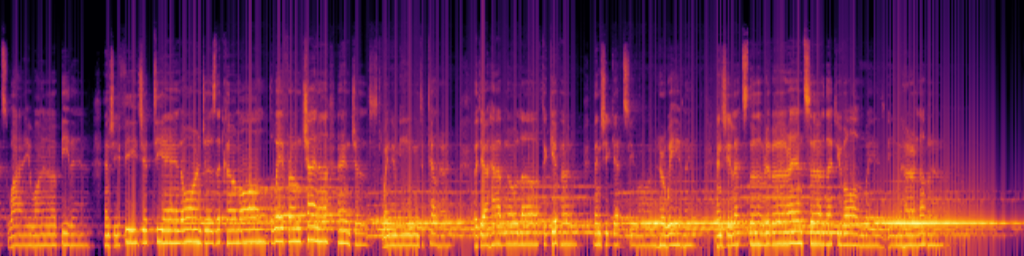

In [16]:
from IPython.display import Image
from melspecx import create_mel_config
from dataclasses import dataclass
from time import time

@dataclass
class MelConfig:
    sample_rate: float
    n_fft: int
    win_length: int
    hop_length: int
    f_min: float
    f_max: float
    n_mels: int
    top_db: float
    onesided: bool




config = create_mel_config(
    sample_rate=sr,
    n_fft=2048,
    win_length=512,
    hop_length=1024,
    f_min=0,
    f_max=sr/2,
    n_mels=128,
    top_db=80,
    onesided=True)
# convert to named tuple

start = time()
config = MelConfig(**config)
mel_spec = melspecx.mel_spectrogram_db_py(
    config, 
    audio)
print("Generated mel spectrogram in {:0.2f} seconds".format(time() - start))
image = melspecx.plot_mel_spec_py(mel_spec, "inferno", 1024, 256)
Image(image)


Audio read time: 47.246375msMel spectrogram generation time: 1.543635167s


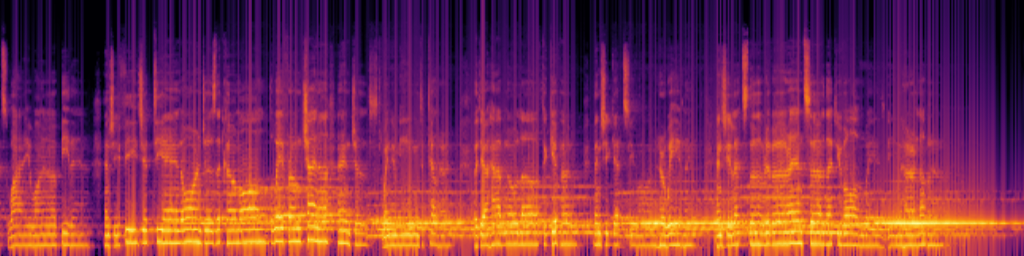

In [7]:
from IPython.display import Image
"""
 path: String,
    n_fft: usize,
    win_length: usize,
    hop_length: usize,
    f_min: f32,
    f_max: f32,
    n_mels: usize,
    colormap: String,
    width_px: u32,
    height_px: u32,
    top_db: f32,


"""

out = melspecx.mel_spec_from_path(str(AUDIO_PATH), 2048, 512, 1024, 0, sr/2, 128, "inferno", 1024, 256, 80)
Image(out)